In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
#read csv file of income dataframe
df=pd.read_csv('income.csv')

In [5]:
#it shows the dataframe entries
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [6]:
#We use the method head() to display the first 5 columns of the dataframe.
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
#find columns of dataframe
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [8]:
#Display the data types of each column using the attribute dtype
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [9]:
#find the summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Name         22 non-null object
Age          22 non-null int64
Income($)    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [10]:
#The describe() function computes a summary of statistics for numeric entries
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


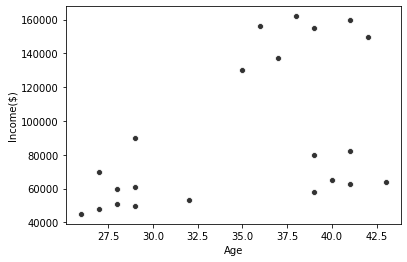

In [11]:
#these Scatterplot shows relationship between age and income .
sns.scatterplot(x=df['Age'],y=df['Income($)'],color='#333333')

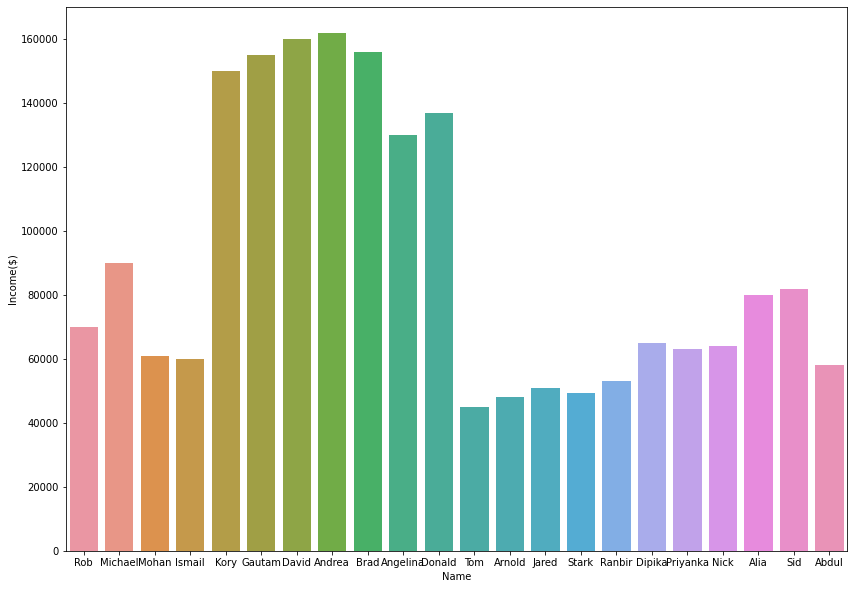

In [12]:
#these barplot shows name and their income 
plt.figure(figsize=(14,10))
sns.barplot(x=df['Name'],y=df['Income($)'])

# Applying Kmean Algorithm

In [13]:
#Number of clusters form it means how many group you want to create
KM = KMeans(n_clusters=3)
Y_predict=KM.fit_predict(df[['Age','Income($)']])
Y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [14]:
#add column 'Cluster' having values of y_predict in given dataframe
df['Cluster']=Y_predict

In [15]:
#show dataframe after adding "Cluster" column
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [16]:
#it shows the X and Y coordinates of centroid
KM.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

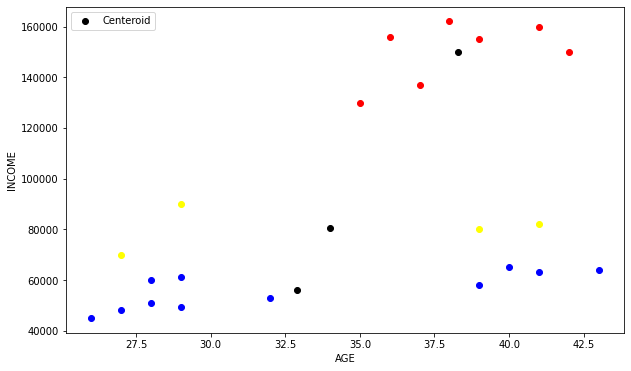

In [17]:
plt.figure(figsize=(10,6))
df0=df[df.Cluster==0]     #Create new dataframe having Cluster values equal to '0'
df1=df[df.Cluster==1]     #Create new dataframe having Cluster values equal to '1'
df2=df[df.Cluster==2]     #Create new dataframe having Cluster values equal to '2'

#Scatter plot of df0,df1,df2
plt.scatter(df0.Age,df0['Income($)'],color='Yellow')
plt.scatter(df1.Age,df1['Income($)'],color='Red')
plt.scatter(df2.Age,df2['Income($)'],color='Blue')

plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='black',label='Centeroid')

# X("AGE") and Y("INCOME") label and legend
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()

    These clustering does not done properly becouse as shown in the plot there is some clusters having Blue point entry and Yellow point entry get mixup, we want clear and seprated clustering.
    To fix thise we use MinMaxscaler for scaling Age and Income values.
    It set all values of Age and Income in between 0 to 1 .

In [19]:
# It shows the data after preprocessing ,We can see that all the values of Age and Income now are between 0 to 1 .
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


#### After updating dataframe 

In [20]:
#predict new clusters
Y_predict_new=KM.fit_predict(df[['Age','Income($)']])
df['Cluster_new']=Y_predict_new
Y_predict_new


array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

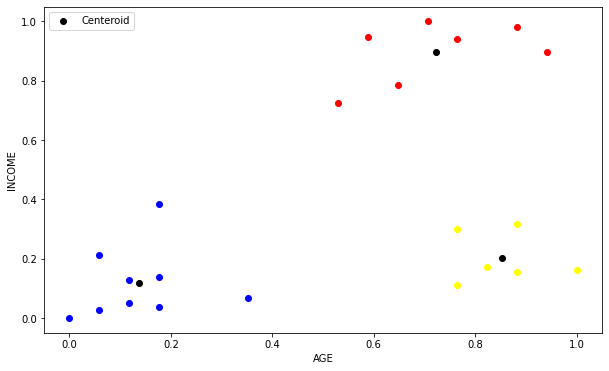

In [21]:
plt.figure(figsize=(10,6))
df0=df[df.Cluster_new==0]     #Create new dataframe having Cluster values equal to '0'
df1=df[df.Cluster_new==1]     #Create new dataframe having Cluster values equal to '1'
df2=df[df.Cluster_new==2]     #Create new dataframe having Cluster values equal to '2'
#Scatter plot of df0,df1,df2
plt.scatter(df0.Age,df0['Income($)'],color='Yellow')
plt.scatter(df1.Age,df1['Income($)'],color='Red')
plt.scatter(df2.Age,df2['Income($)'],color='Blue')

plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='black',label='Centeroid')

# X("AGE") and Y("INCOME") label and legend
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.legend()

    It's great,in this plot all the entry point having same color in specific clusters therefore we can say that our clustering is done successfully. 

In [22]:
#now using SSE (Sum of Squared errors) we can find best number clusters of given dataframe
SSE=[]
K_M = list(range(1,10))
for k in K_M:
    KM=KMeans(n_clusters=k)
    KM.fit_predict(df[['Age','Income($)']])
    SSE.append(KM.inertia_) 
print(SSE)

[5.43401151198818, 2.091136388699078, 0.4750783498553096, 0.3491047094419565, 0.2621792762345213, 0.21055478995472493, 0.17462386586687895, 0.13937852495507838, 0.10497488680620906]


Text(0, 0.5, 'Sum of Squared error')

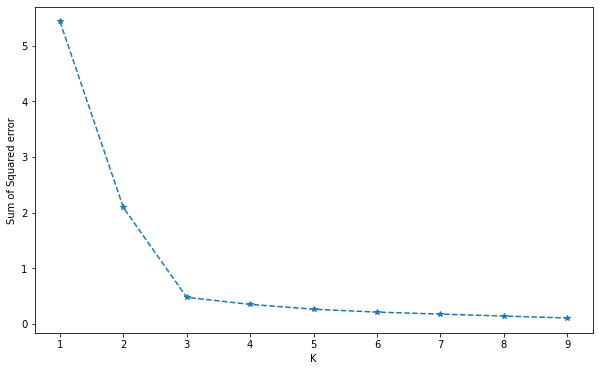

In [23]:
#for decide the best value of cluster we plot a graph between K_M and SSE 
#and see at which point our plot bent like elbow and this point is out best value of Cluster 
plt.figure(figsize=(10,6))
plt.plot(K_M,SSE,'*--')
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

As we discuss above and plot we can say that 3 clusreing is best for this dataframe 

### There are some plot below having relationship between K_M and SSE 

Text(0, 0.5, 'Sum of Squared error')

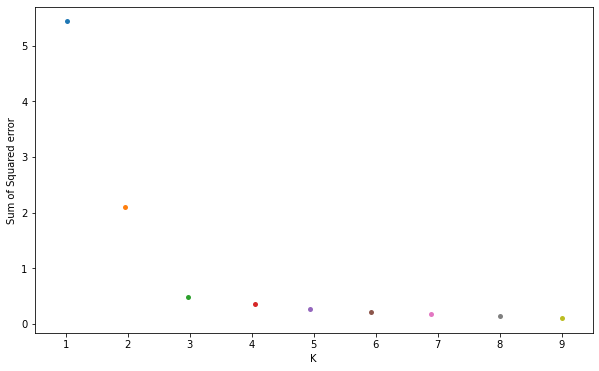

In [24]:
plt.figure(figsize=(10,6))
sns.stripplot(K_M,SSE)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

Text(0, 0.5, 'Sum of Squared error')

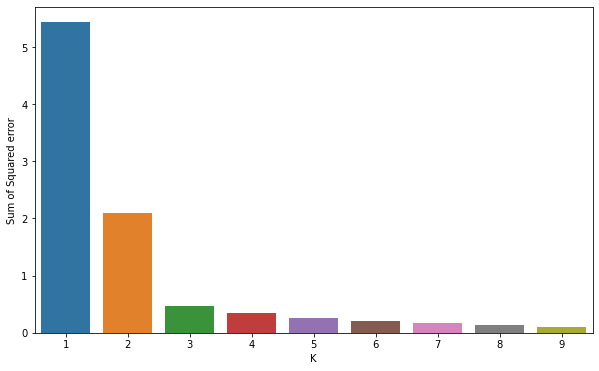

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(K_M,SSE)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

Text(0, 0.5, 'Sum of Squared error')

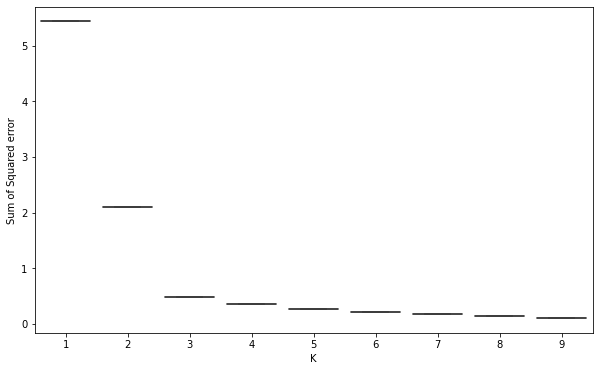

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(K_M,SSE)
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

In [28]:
Y_predict.sum()

29